In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import csv,json
import os
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(1)
np.random.seed(1)


In [7]:
data=pd.read_csv("Skyserver250k.csv")

In [8]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237661976015274033,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2020027785916999680,QSO,1.984419,1794,54504,594
1,1237661362373066810,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1649585252231833600,GALAXY,0.064456,1465,53082,516
2,1237661360767238272,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3812387877359296512,STAR,-0.000509,3386,54952,330
3,1237665440983416884,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6762291282364878848,QSO,1.882893,6006,56105,496
4,1237665531717812262,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4454292673071960064,STAR,-0.000295,3956,55656,846


In [9]:
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
249995,1237661360767565997,221.101714,40.641045,19.30748,18.22145,17.61426,17.32240,17.02841,3699,301,2,199,1572955889466370048,GALAXY,0.158805,1397,53119,268
249996,1237667783903084693,171.645089,22.797546,19.19911,17.79553,17.03988,16.63705,16.31786,5194,301,6,381,2814852916416899072,GALAXY,0.034430,2500,54178,375
249997,1237648704591233226,215.751103,0.044486,18.88386,17.51738,16.89393,16.39914,16.07888,752,301,4,482,342430828837496832,GALAXY,0.078681,304,51609,572
249998,1237660634386923630,163.501339,44.470389,18.49867,16.73666,15.88036,15.48524,15.14631,3530,301,1,286,1614541342266910720,GALAXY,0.048519,1434,53053,3
249999,1237668271376236954,236.495641,12.142432,19.39894,18.40550,18.06466,17.93771,17.87524,5308,301,2,295,5517031135849500672,STAR,0.000864,4900,55739,442


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      250000 non-null  int64  
 1   ra         250000 non-null  float64
 2   dec        250000 non-null  float64
 3   u          250000 non-null  float64
 4   g          250000 non-null  float64
 5   r          250000 non-null  float64
 6   i          250000 non-null  float64
 7   z          250000 non-null  float64
 8   run        250000 non-null  int64  
 9   rerun      250000 non-null  int64  
 10  camcol     250000 non-null  int64  
 11  field      250000 non-null  int64  
 12  specobjid  250000 non-null  uint64 
 13  class      250000 non-null  object 
 14  redshift   250000 non-null  float64
 15  plate      250000 non-null  int64  
 16  mjd        250000 non-null  int64  
 17  fiberid    250000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 34.3

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,250000.0,1.237663e+18,7.216137e+12,1.237646e+18,1.237658e+18,1.237662e+18,1.237667e+18,1.237681e+18
ra,250000.0,1.784307e+02,7.813048e+01,5.132266e-03,1.381330e+02,1.814895e+02,2.247345e+02,3.599996e+02
dec,250000.0,2.442287e+01,2.006467e+01,-1.966946e+01,6.862839e+00,2.308317e+01,3.951045e+01,8.485215e+01
u,250000.0,1.863622e+01,8.306002e-01,1.061181e+01,1.821335e+01,1.887035e+01,1.926975e+01,1.960000e+01
g,250000.0,1.740868e+01,9.836587e-01,9.300097e+00,1.685339e+01,1.751653e+01,1.805644e+01,1.999605e+01
r,250000.0,1.688487e+01,1.128851e+00,8.814259e+00,1.619924e+01,1.689797e+01,1.758660e+01,3.320992e+01
i,250000.0,1.659035e+01,2.006745e+01,-9.999000e+03,1.586811e+01,1.660804e+01,1.734732e+01,3.234917e+01
z,250000.0,1.639336e+01,2.835680e+01,-9.999000e+03,1.562544e+01,1.643695e+01,1.723782e+01,3.001704e+01
run,250000.0,3.990886e+03,1.680147e+03,9.400000e+01,2.830000e+03,3.910000e+03,5.061000e+03,8.162000e+03
rerun,250000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [12]:
data.nunique()

objid        249995
ra           249995
dec          249995
u            151533
g            176144
r            184536
i            187881
z            191302
run             557
rerun             1
camcol            6
field           849
specobjid    250000
class             3
redshift     247211
plate          6464
mjd            2202
fiberid        1000
dtype: int64

In [13]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [14]:
data["class"].value_counts(1)*100

GALAXY    50.8468
STAR      38.4464
QSO       10.7068
Name: class, dtype: float64

In [15]:
data.duplicated().sum()

0

In [16]:
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data["class"] = data["class"].astype(int)

In [17]:
data["class"]

0         1
1         0
2         2
3         1
4         2
         ..
249995    0
249996    0
249997    0
249998    0
249999    2
Name: class, Length: 250000, dtype: int32

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,250000.0,1.237663e+18,7.216137e+12,1.237646e+18,1.237658e+18,1.237662e+18,1.237667e+18,1.237681e+18
ra,250000.0,1.784307e+02,7.813048e+01,5.132266e-03,1.381330e+02,1.814895e+02,2.247345e+02,3.599996e+02
dec,250000.0,2.442287e+01,2.006467e+01,-1.966946e+01,6.862839e+00,2.308317e+01,3.951045e+01,8.485215e+01
u,250000.0,1.863622e+01,8.306002e-01,1.061181e+01,1.821335e+01,1.887035e+01,1.926975e+01,1.960000e+01
g,250000.0,1.740868e+01,9.836587e-01,9.300097e+00,1.685339e+01,1.751653e+01,1.805644e+01,1.999605e+01
r,250000.0,1.688487e+01,1.128851e+00,8.814259e+00,1.619924e+01,1.689797e+01,1.758660e+01,3.320992e+01
i,250000.0,1.659035e+01,2.006745e+01,-9.999000e+03,1.586811e+01,1.660804e+01,1.734732e+01,3.234917e+01
z,250000.0,1.639336e+01,2.835680e+01,-9.999000e+03,1.562544e+01,1.643695e+01,1.723782e+01,3.001704e+01
run,250000.0,3.990886e+03,1.680147e+03,9.400000e+01,2.830000e+03,3.910000e+03,5.061000e+03,8.162000e+03
rerun,250000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [19]:
data.nunique()

objid        249995
ra           249995
dec          249995
u            151533
g            176144
r            184536
i            187881
z            191302
run             557
rerun             1
camcol            6
field           849
specobjid    250000
class             3
redshift     247211
plate          6464
mjd            2202
fiberid        1000
dtype: int64

In [20]:
def hist_box(column):
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(0.15,0.20)},figsize=(10,10))
    sns.set(style="darkgrid")
    sns.distplot(data[column],ax=ax_hist)
    sns.boxplot(data[column],ax=ax_box,showmeans=True)
    ax_hist.axvline(data[column].mean(),color="green",linestyle="--")
    ax_hist.axvline(data[column].median(),color="red",linestyle="-")
    plt.show()

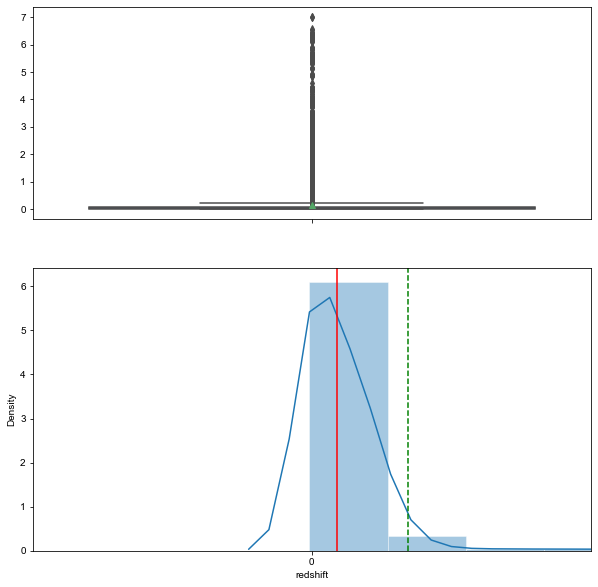

In [21]:
hist_box("redshift")

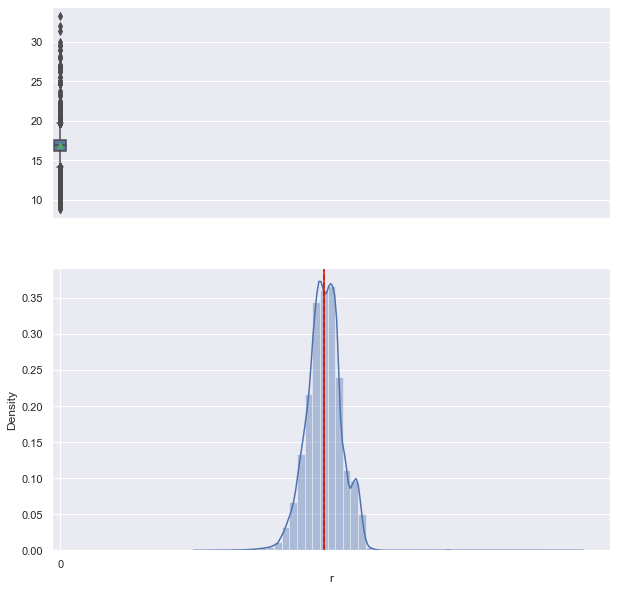

In [22]:
hist_box("r")

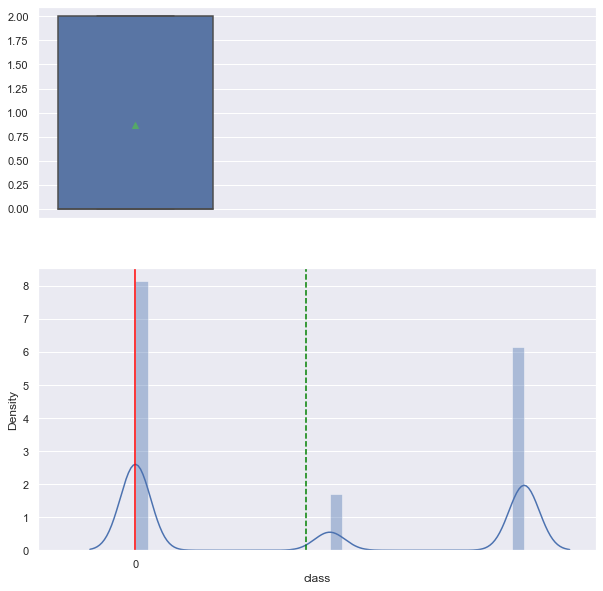

In [23]:
hist_box("class")

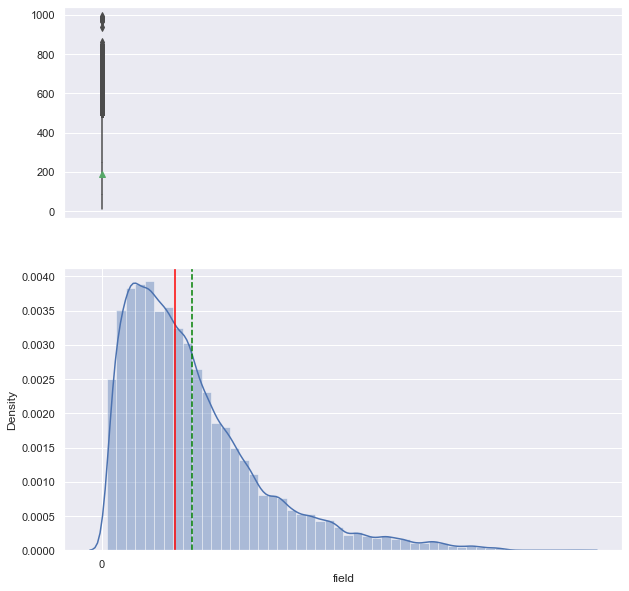

In [24]:
hist_box("field")

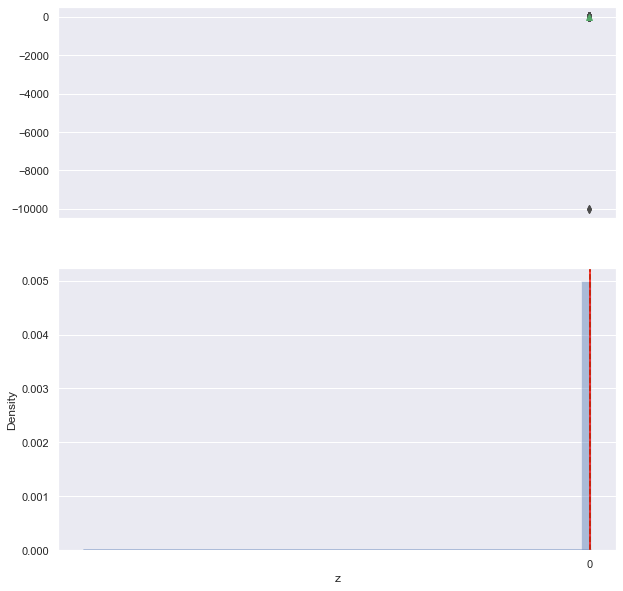

In [25]:
hist_box("z")

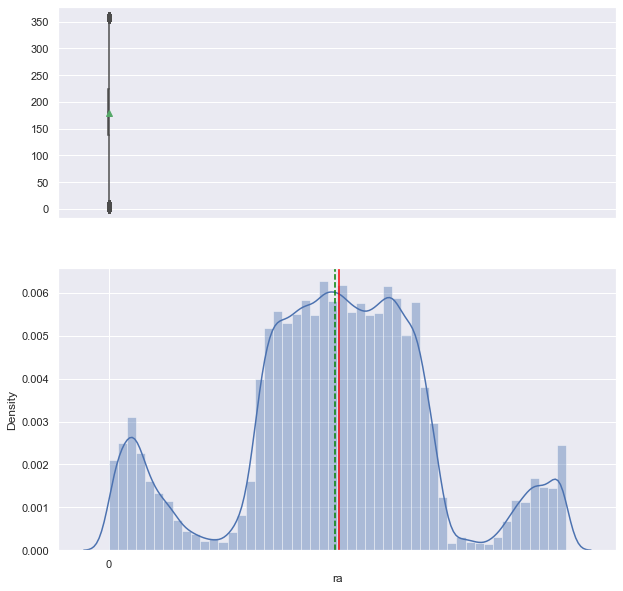

In [26]:
hist_box("ra")

In [27]:
sns.boxplot(data["class"],data["redshift"],palette="PuBu")

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

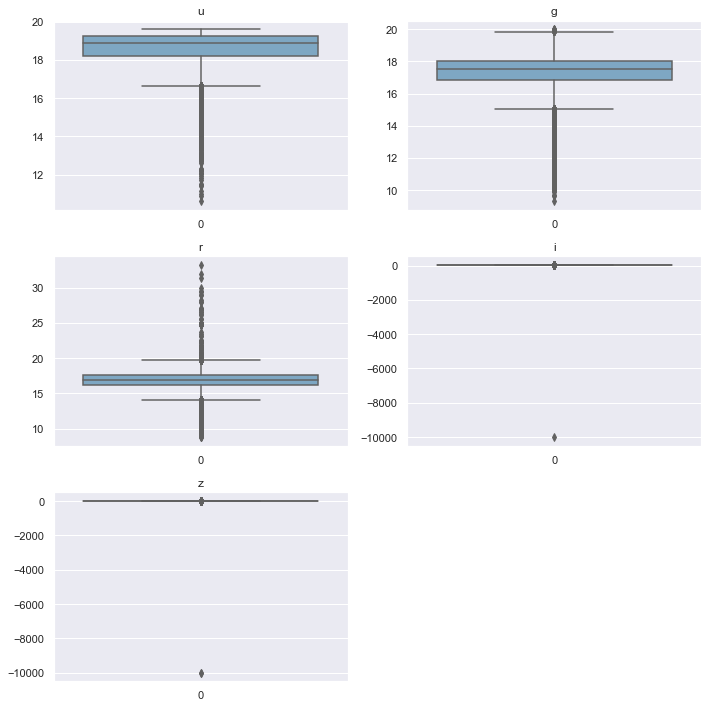

In [53]:
cols=data[["u","g","r","i","z"]].columns.tolist()
plt.figure(figsize=(10,10))
for i,v in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[v],palette="PuBu")
    plt.tight_layout()
    plt.title(v)
plt.show()

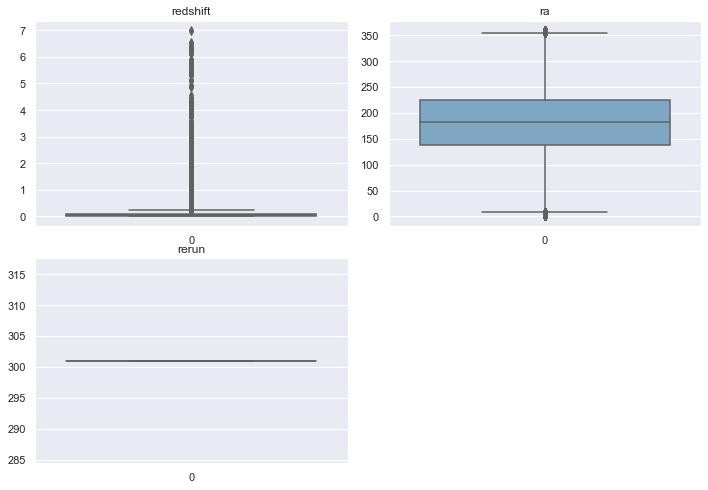

In [55]:
cols=data[["redshift","ra","rerun"]].columns.tolist()
plt.figure(figsize=(10,10))
for i,v in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[v],palette="PuBu")
    plt.tight_layout()
    plt.title(v)
plt.show()

In [32]:
x=data.drop(["class"],axis=1)
y=data[["class"]]



In [33]:
data[["class"]]

,class
0,1
1,0
2,2
3,1
4,2
...,...
249995,0
249996,0
249997,0
249998,0


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)
print('X Train Shape:', x_train.shape)
print('X Test Shape:', x_test.shape)
print('Y Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

X Train Shape: (200000, 17)
X Test Shape: (50000, 17)
Y Train Shape: (200000, 1)
Y Test Shape: (50000, 1)


In [35]:
def metrics_score(actual,predicted):
    print(classification_report(actual,predicted))
    cm=confusion_matrix(actual,predicted)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt=".2f",xticklabels=["Galaxy","Quasar","star"],yticklabels=["Galaxy","Quasar","star"])
    plt.ylabel("Actual")
    plt.xlabel("predicted")
    plt.show()

              precision    recall  f1-score   support

           0       0.80      0.96      0.87    101694
           1       0.60      0.27      0.37     21413
           2       0.90      0.80      0.85     76893

    accuracy                           0.82    200000
   macro avg       0.77      0.68      0.70    200000
weighted avg       0.82      0.82      0.81    200000



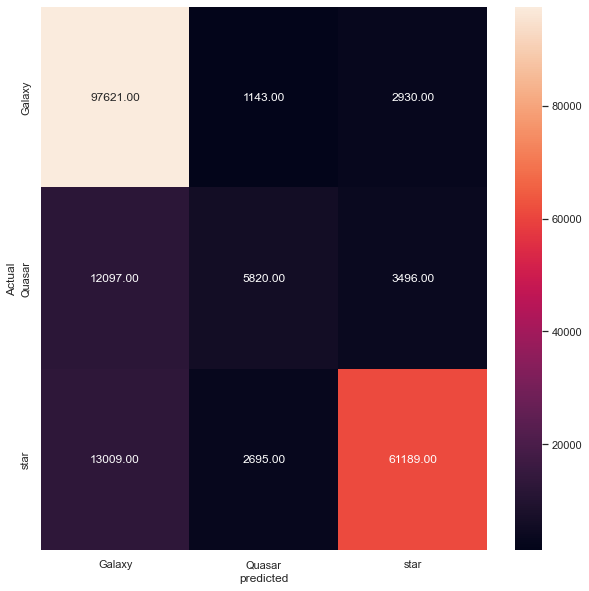

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model_pred=knn_model.predict(x_train)
metrics_score(y_train,knn_model_pred)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     25423
           1       0.35      0.16      0.22      5354
           2       0.85      0.74      0.79     19223

    accuracy                           0.78     50000
   macro avg       0.66      0.61      0.62     50000
weighted avg       0.76      0.78      0.76     50000



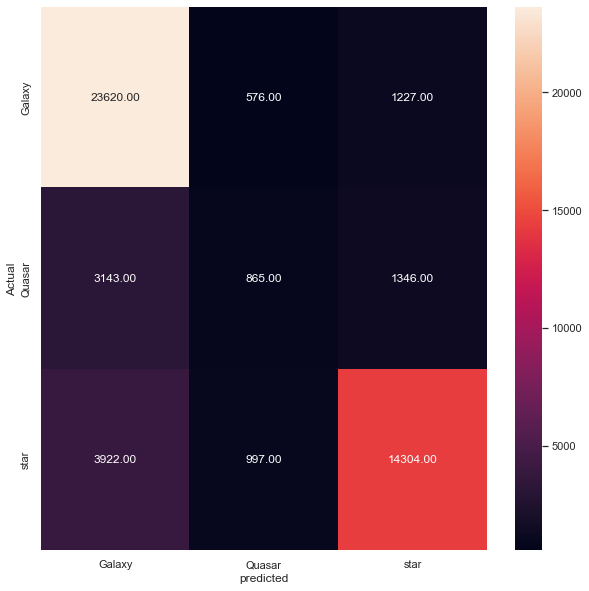

In [37]:
y_test_pred=knn_model.predict(x_test)
metrics_score(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.51      1.00      0.67    101694
           1       0.00      0.00      0.00     21413
           2       0.00      0.00      0.00     76893

    accuracy                           0.51    200000
   macro avg       0.17      0.33      0.22    200000
weighted avg       0.26      0.51      0.34    200000



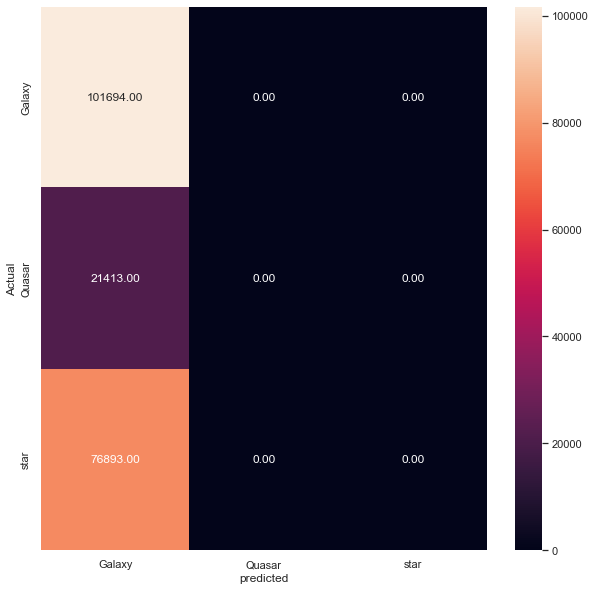

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar=StandardScaler()
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.fit_transform(x_test)
pca=PCA()
x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.fit_transform(x_test_std)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_train_predictions = knn_model.predict(x_train_pca)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           0       0.51      1.00      0.67     25423
           1       0.00      0.00      0.00      5354
           2       0.00      0.00      0.00     19223

    accuracy                           0.51     50000
   macro avg       0.17      0.33      0.22     50000
weighted avg       0.26      0.51      0.34     50000



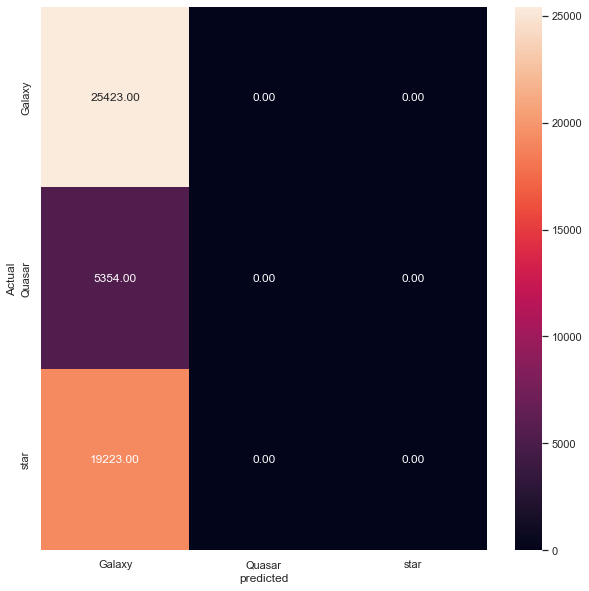

In [39]:
y_test_pred_knn = knn_model.predict(x_test_pca)
metrics_score(y_test, y_test_pred_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101694
           1       1.00      1.00      1.00     21413
           2       1.00      1.00      1.00     76893

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



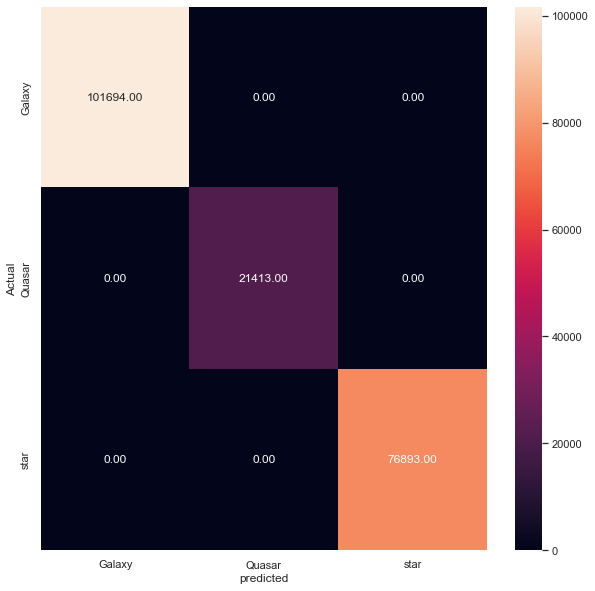

In [40]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25423
           1       0.94      0.95      0.95      5354
           2       1.00      1.00      1.00     19223

    accuracy                           0.99     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.99      0.99      0.99     50000



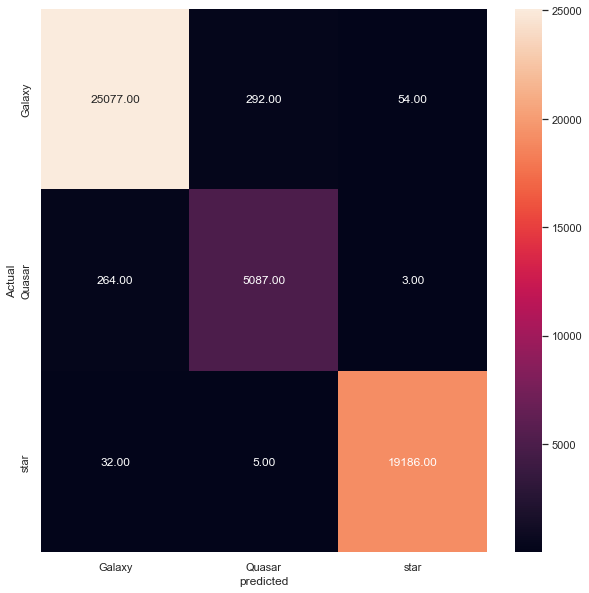

In [41]:
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x_test,y_test,cv=5)
print(np.average(score))

0.9854799999999999


In [43]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101694
           1       1.00      1.00      1.00     21413
           2       1.00      1.00      1.00     76893

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



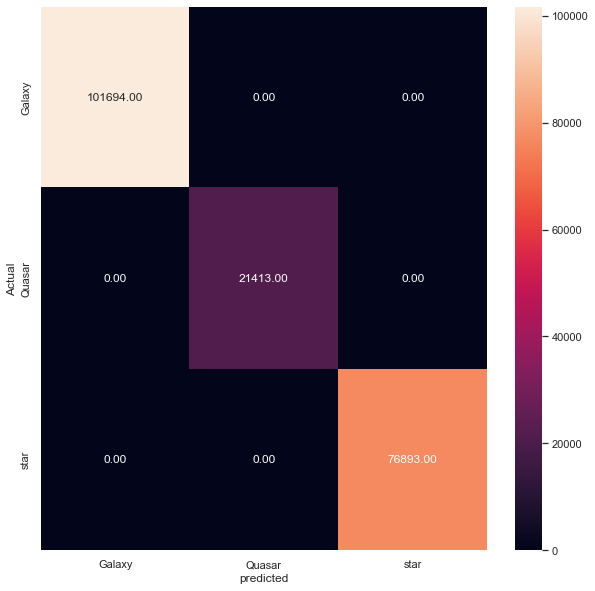

In [44]:
dt=DecisionTreeClassifier(random_state=1)
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.fit_transform(x_test)
dt.fit(x_train_std,y_train)
y_train_pred_dt=dt.predict(x_train_std)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     25423
           1       0.75      0.78      0.76      5354
           2       0.99      1.00      0.99     19223

    accuracy                           0.94     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.94      0.94      0.94     50000



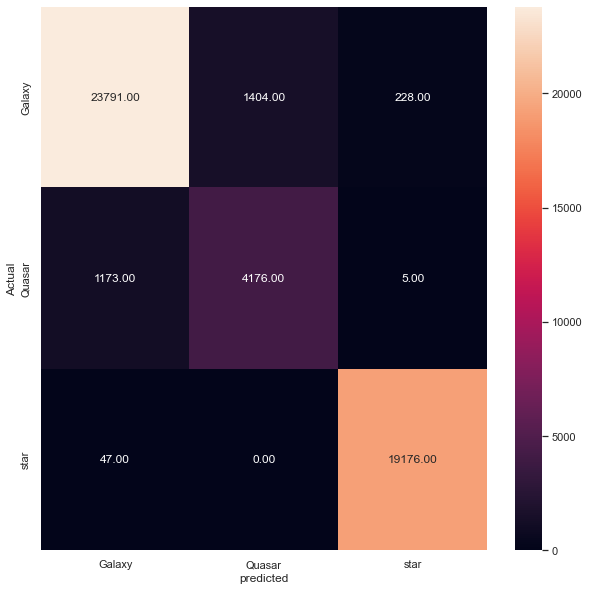

In [45]:
y_test_pred_dt=dt.predict(x_test_std)
metrics_score(y_test,y_test_pred_dt)

In [46]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x_test_std,y_test,cv=5)
print(np.average(score))

0.9857000000000001


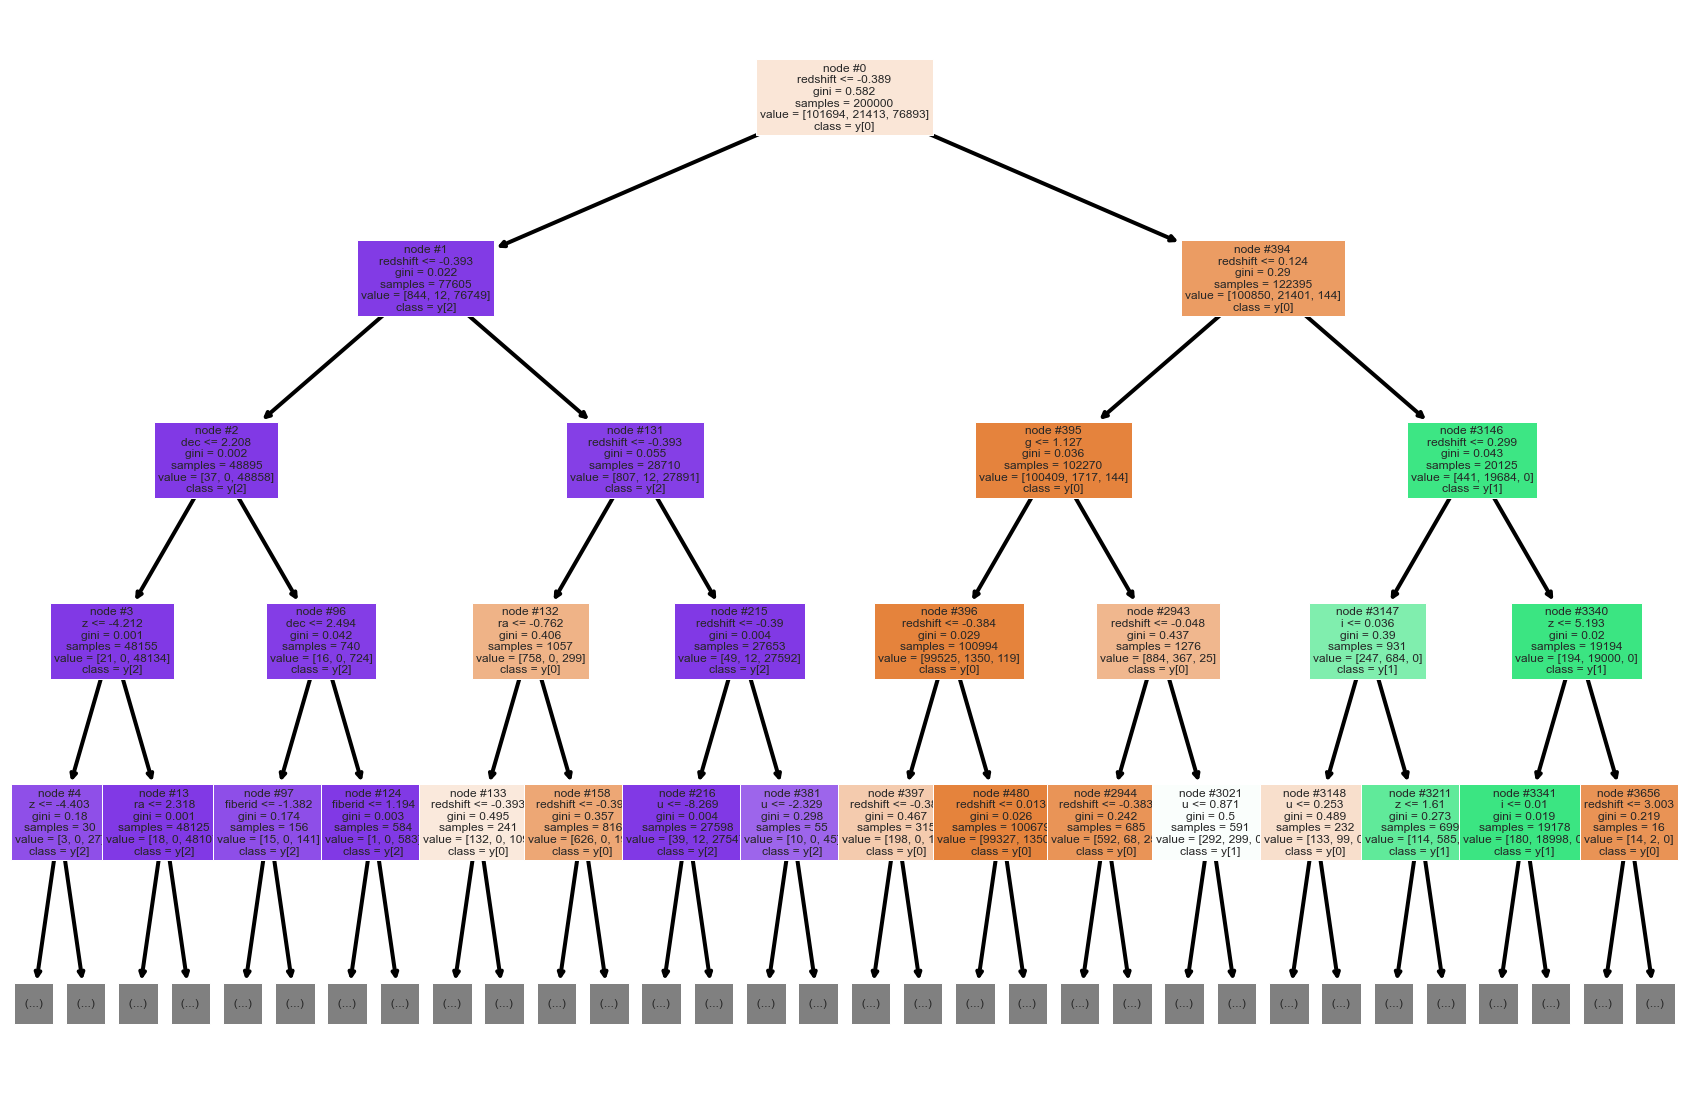

In [49]:
features=list(x.columns)
plt.figure(figsize=(30,20))
out=tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
for i in out:
    arrow=i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(4)
plt.show()
    
